# Neural Networks and Model Persistence

In this notebook we will get some practice with neural networks for classification. Fully Connected Neural Networks are very similar to those built for regression with a few differences:

* The loss function is the Cross-Entropy instead of the Squared Error
* For multi-class classification there are as many output neurons as there are classes
* Output neurons have a sigmoid activation function to produce probabilities between 0 and 1
* A final softmax layer is needed to produce normalised probabilities (i.e. the sum of all the outputs is equal to 1)

Below you can find a diagram of a 3-hidden layer FCNN built for a 4-class classification problem:

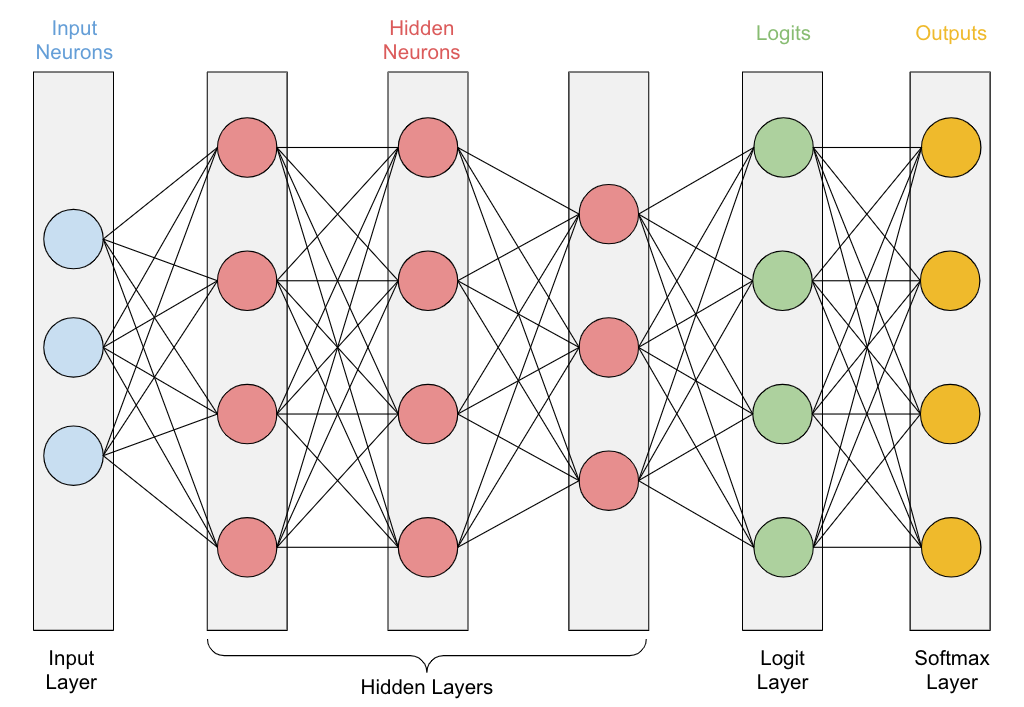

## The Brief

Remember the MNIST dataset from the neural networks module? This dataset was used by Yann Lecun and his team for handwritten digit recognition in one of the first commercial applications of neural networks back in the 1990s. 

Ever since the MNIST dataset has become a 'canonical' dataset, used by countless researchers to validate and benchmark their models. In this brief we will use a similar dataset but we'll take it one step further.

We will be working on a variation of the MNIST dataset called the **Fashion MNIST**. It's still composed of black and white, 28 pixels by 28 pixels images, but instead of trying to classify handwritten digits between 0 and 9, we'll try to classify images between 10 different items of clothing. Our classes are the following:

* T-shirt/top
* Trouser
* Pullover
* Dress
* Coat
* Sandal
* Shirt
* Sneaker
* Bag
* Ankle boot

A sample of 10 images from each of the 10 classes can be found below:


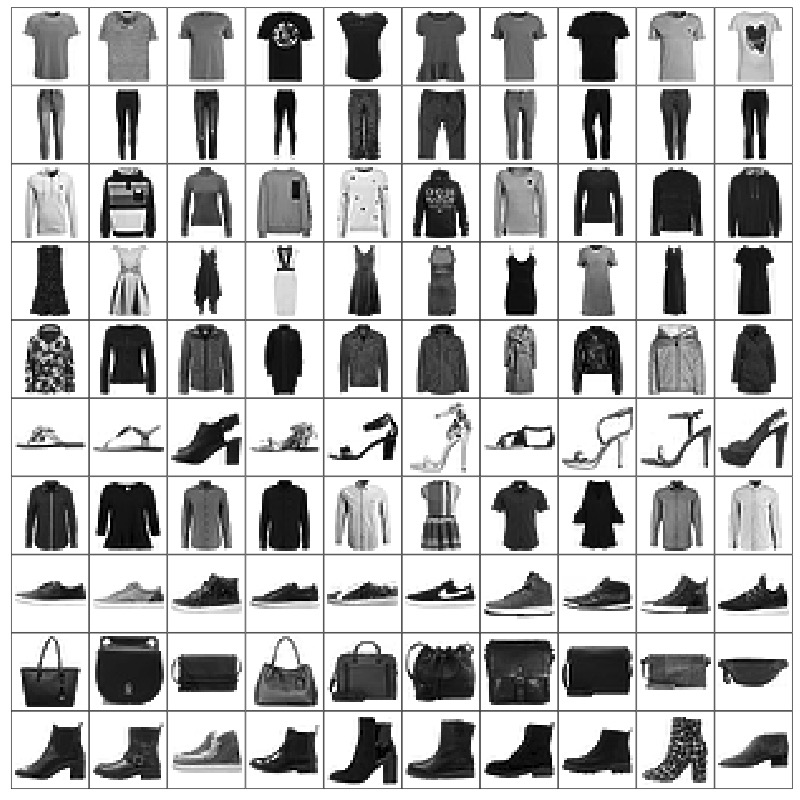

Take a look at the [Github page](https://github.com/zalandoresearch/fashion-mnist) of the dataset for some more information on the dataset and some nice visualisations.

---

### FCNNs for Image Classification

You might remember from our discussion on the various families of neural network architectures that for anything image related, the industry standard is to use Convolutional Neural Networks (CNNs). While that is certainly the case, for simple black and white images like those in the MNIST or Fashion MNIST datasets, it is still possible to use FCNNs for classification.

The way we feed an image to an FCNN is by first **flattening** it, that is transforming it from a 28x28 matrix to a 28\*28=784 vector. See the image below for an example of flattening one of the original MNIST images:

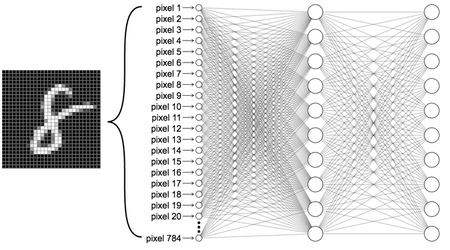

---

## Model Persistence

As you may have noticed in the module on neural networks, these algorithms can be quite time consuming to train, specially if we make use of tools like `GridSearchCV`. If you spend a day training and fine-tuning your network you might want to **save the model for later reuse**, so that you don't have to train from scratch every time you open the notebook or restart the kernel. This idea of saving and loading models is usually known as **model persistence**.

Happily, saving and loading `sklearn` models is a breeze thanks to a library called `joblib`. **Any** `sklearn` model, regardless of its complexity, can be saved in an efficient and quick way and loaded back in with only a couple lines or code.

* To **save** a model to disk, simply import `joblib` and then run `joblib.dump(your_model, 'your_model_file.joblib')`
* To **load** a saved model, simply import `joblib` and then run `loaded_model = joblib.load('tour_model_file.joblib')`

You can find a self-contained example in the following cell where we train a logistic regression on some toy data, then save the model, load it up from the disk and verify that both models are the same by evaluating them on the test set:

In [ ]:
# To save/load models
import joblib

# Various sklearn functions and classes
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


# Make some toy data and train test split
X, y = make_classification(random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Define and fit a logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Evaluate the logistic regression on the test set
preds = log_reg.predict(X_test)
mae = mean_absolute_error(y_test, preds)
print('MAE:', mae)

# Save the trained (i.e. fitted model)
joblib.dump(log_reg, 'logistic_regression.joblib')


#######################


# Load the trained model
pretrained_log_reg = joblib.load('logistic_regression.joblib')

# Evaluate again on the test set, the MAE is the same
new_preds = pretrained_log_reg.predict(X_test)
new_mae = mean_absolute_error(y_test, new_preds)
print('New MAE:', new_mae)

Being able to save and load your models is a crucial skill that can save you tons of time and that allows for closer collaboration with your peers.

---

## Classifying Fashion MNIST with Neural Networks

As you can see in the [Fashion MNIST Github](https://github.com/zalandoresearch/fashion-mnist) and the [Fashion MNIST Kaggle page](https://www.kaggle.com/zalando-research/fashionmnist), the data comes already split into a training and testing set. 

The training set contains 60,000 images and the test set 10,000. The images do not come as standard `jpeg` files, but as a csv, where each column represents one of the 28\*28=784 pixels. 

Training even the smallest neural network on the train set can take up a few minutes so we have already trained a network on the training set, which you can download below. Furthermore we have applied some pre-processing steps to the data, namely:

* Added the actual class labels instead of numbers (for easier to interpret plots)
* Normalized each pixel column to [0, 1]

You can find links to download the preprocessed train and test set, as well as the pre-trained module below. **Note**: The training data is only used in an optional challenge, so feel free to skip it for now and come back and download it later.

* TBD
* TBD
* TBD

---

## Imports

As you progress through the notebook, scroll back up here to keep your imports nice and tidy.

In [ ]:
# Imports

## Challenge 0: Load and Transform the Data

Load and explore your data (feel free to stick to the test set only). Explore how many rows and columns, what are the types, etc.

Then create an `X_test` and `y_test` variables (and `X_train` and `y_train` if you're going for the optional challenge).

In [ ]:
# Load the data


# Exploration


# Create X and y variables


## Challenge 1: Getting to know your Data

For this first challenge we will get familiar with our data. As mentioned above, the images come 'flattened' in a csv. Each row represents an image, and each of the 28*\28=784 pixels are columns. Let's start by seeing how to plot some of these images.

Try to plot a random row from the test set. There are some tips below. As always, feel free to refer to the completed notebook if you get stuck:

* First we'll need to turn the particulat image from a 784 vector to a 28x28 matrix. You can reshape numpy arrays with `.reshape()`. To turn a pandas `Series` into a numpy array, use `.values`. 
* Once you have a 28x28 matrix, you can plot it with matplotlib using `plt.imshow()`. 
* You might want to experiment with different colormaps (try to find a black and white palette).

Once you've figured out how to display images, spend some time looking at the data, trying to visualise a few images for each class.

**\[Optional\]**: Create a 5x5 grid with a random sample of images.

In [ ]:
# Visualise some items in the test set

# We begin by selecting a random row number


# Select that row (returns a pandas series) and corresponding label


# Turn pandas series into numpy array and reshape


# Plot with a balck and white palette and add title


In [ ]:
# Optional: Plot a 5x5 grid of random images with titles


## Challenge 2: Getting to know your Model

Now that we've gotten to know our data, it's time to get to know our model. Load up the pre-trained model using `joblib` and inspect the hyperparameters of the networks. What's the architecture (hidden layers and hidden sizes)? How about the learning rate? Can you plot its loss curve?

In [ ]:
# Load the pre-trained model


# Explore some of its hyperparameters


# Plot the loss curve


## Challenge 3: Evaluating the Model on the Test Data

Use the pre-trained model to assess its **accuracy** on the test set. Once you have an idea of the accuracy, head over to the [Fashion MNIST Github](https://github.com/zalandoresearch/fashion-mnist) and compare it against other models and against specifically against normal human performance.

In [ ]:
# Calculate the accuracy of the pre-trained model on the test set



## \[Optional\] Challenge 4: Train a new Model

As you may have noticed, even with a relatively simple FCNN we are able to surpass human performance by quite a significant margin. However, we might be able to do better with a different architecture or set of hyperparameters. 
 
**Important note**: As mentioned earlier even the simplest networks can take quite a long time to run. On a MacBook Pro with a 1.4 GHz Quad-Core Intel Core i5 processor, it took 12 minutes to train the network that was shared above.

If you do end up training a network, evaluate it on the test set. If you get better performance than our pre-trained network, **save** your trained network using `joblib` and make sure you share the good news with your mentor!

In [ ]:
# Train a neural network on the train set (the example below trains the network that was shared)


In [ ]:
# Visualise the loss curve


In [ ]:
# Save the model


## Challenge 5: Understanding Model Performance - Confusion Matrix

For the remainder of this notebook we will be questioning our model and trying to understand the kinds of mistakes it makes. Let's begin by plotting the **confusion matrix** as a **heatmap**. Don't forget to add the class labels available in your model's `.classes_` attribute as `xticklabels` and `yticklabels`.

Write a short paragraph with your findings. Mistaking a shirt for a t-shirt/top is not too bad but mistaking a bag for a coat is a different story! What classes does it confuse the most? Does it make sense? 

In [ ]:
# Calculate and plot the confusion matrix


**Comments:**

## Challenge 6: Understanding Model Performance - Adding Predicted Classes and Probabilities to our Dataframe

Before we can continue exploring the types of mistakes our network makes let's add a couple of columns to our original test set dataframe. We want to add two new columns:

* The predicted classes
* The probability of that predicted class

The first item in the list we've already calculated, so we just need to add it to the dataframe. For the second item we need to get the probabilities using `.predict_proba()`. This will return, for each example in the test set, a list with the probabilities for each class. Since there are 10,000 examples and 10 different classes, `.predict_proba()` will return a matrix of dimensions (10000, 10). Since we only care about the probability for the **majority class** we can use `np.max()` along `axis=1` to get the maximum probability.

In [ ]:
# Add the predicted class to the test dataframe


# Calculate the probabilities


# Caluclate the maximum probability for each example with np.max() and axis=1


# Add the max probabilites to the dataframe


# Check your results by printing a few rows


## Challenge 7: Understanding Model Performance - Exploring Mistakes by Class

At this point we have all the tools to focus and analyse specific mistakes. Since we have the real class, the predicted class, and the probability of that predicted class, we can examine examples where the network is 'overconfident' when it's actually making a mistakes. 

Pick a pair of true/predicted classes and explore the examples where the network is most confident in its (wrong) prediction. Can you visualise these images? Would you have done better than the network? Feel free to explore as much as you want!

**Hints**:
* You can begin by creating a secondary dataframe based on two conditions. For example if we wanted a secondary dataframe of bags that were predicted as shirts we could type:
> ```python
bags_as_shirts = df_test[(df_test.label == 'Bag') & (df_test.predicted_class == 'Shirt')]
```

* You can sort this new dataframe in descending order of predicted probabilities

* It may be useful for plotting to extract the pixels. Since we have the true label as the first column, and the predicted class in its probability at the end, we can use: 
> ```python
bags_as_shirts_pixels = bags_as_shirts.iloc[:, 1:-2]
```

* You are now ready to plot!

In [ ]:
# Explore some cases of network overconfidence

# We will focus on bags that were predicted as shirts


# Sort the new dataframe by the predicted probability


# Split the pixels


# Visualise the top 5 (or less if there are less than 5) overconfident mistakes



Some of the above images could easily be mistaken 

## \[Optional\] Challenge 8: Understanding Model Performance - Exploring Mistakes by Class as a Function

The code we've written above is fantastic for exploring the types of mistakes our neural network makes. But as it stands it only works for a pair of true/predicted classes. Can you turn it into a function? 

Ideally this function would take two arguments: `true`, and `predicted`, and it will do all the filtering, sorting, pixel extraction and plotting for us.

In [ ]:
# Turn the above code into a function


In [ ]:
# Try it out!
